Creating first MVP product; for Jun 7 2018

## Install Libraries

#### Python library resource: https://awesome-python.com/

Installations for extra packages: 
- !pip install SpeechRecognition
- !pip install PocketSphinx
- !brew install portaudio
- !pip install pyaudio
- !pip install sumy
- !pip install --upgrade google-api-python-client
- !pip install --upgrade google-cloud-speech
- !pip install oauth2client
- !pip install pyAudioAnalysis ; 2to3 -w *.py; fixes

## Data Sources:

- __[NYT daily from podbay](http://podbay.fm/show/1200361736/e/1527587699?autostart=1)__; 
- NYT daily: https://itunes.apple.com/us/podcast/the-daily/id1200361736?mt=2&ign-mpt=uo%3D4
- Open Audio Source: http://www.openslr.org/resources.php
- Economist: https://www.economist.com/audio-edition/2018-06-02
- Economist text: https://xmuplus.github.io/
- NPR: https://www.npr.org/programs/morning-edition/
- NPR sunday: https://www.npr.org/programs/weekend-edition-sunday/
- Ted talk: https://itunes.apple.com/us/podcast/ted-talks-daily/id160904630?mt=2
- Public meeting: http://www.sbccd.org/Board_of_Trustees/Agendas_and_Minutes
- NPR upfirst: https://www.npr.org/podcasts/510318/up-first
- Congress: https://www.loc.gov/item/sn88063877/

## Speech Recognition

- Real python: https://realpython.com/python-speech-recognition/#working-with-audio-files
- Speech Recognition: https://github.com/Uberi/speech_recognition#readme
- Speech Recognition: https://pypi.org/project/SpeechRecognition/3.2.0/
- Pocket Sphinx: https://pypi.org/project/pocketsphinx/
- Pydub: https://github.com/jiaaro/pydub/blob/master/API.markdown
- Audio processing in python: http://myinspirationinformation.com/uncategorized/audio-signals-in-python/
- Speaker Recognition: https://github.com/orchidas/Speaker-Recognition
- Audio training analysis: https://github.com/tyiannak/pyAudioAnalysis

## Natural Language Processing

- Insight: https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e
- Intro/resource: https://github.com/icoxfog417/awesome-text-summarization
- Summy: https://github.com/miso-belica/sumy
- NewsHighlights: https://cs.nyu.edu/~kcho/DMQA/
- Q&AAnswer: https://rajpurkar.github.io/SQuAD-explorer/

## Web App

* Dash audio? https://community.plot.ly/t/audio-recording-feature-in-dash-app/7837
* Flask audio: https://henri.io/posts/streaming-microphone-input-with-flask.html
* Flask example: https://realpython.com/flask-by-example-part-1-project-setup/



***
### Import basic libraries
***


In [3]:
## for speech to text
import speech_recognition as sr


## for audio processing and analytical study
from pydub import AudioSegment ##for audio spliting
from pydub.silence import split_on_silence
from pydub.playback import play

## for audio collection
import pyaudio
import wave

## for text recognition
import nltk
import string
import json

## for general studies
from os import listdir
from os.path import isfile, join
import glob
from numpy import fft as fft
import matplotlib.pyplot as plt
import numpy as np
import sys
import seaborn as sns
from tqdm import tqdm
import time as time
import multiprocessing as mp

## My codes
from src.utils import wer
from src.utils import SoundToText
from src.utils import PrepareSound

## settings
%matplotlib inline

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/Users/renormalization/anaconda/lib/python3.6/site-packages/pydub/utils.py:187: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


In [4]:
## Intitialize a recognizer
r_live = sr.Recognizer()
r_rec  = sr.Recognizer()


***
### Study WAV sound files
***


In [5]:
!ls Data/NCE/2/*1*.wav

Data/NCE/2/1.wav    Data/NCE/2/1_0.wav  Data/NCE/2/1_19.wav Data/NCE/2/1_7.wav
Data/NCE/2/10.wav   Data/NCE/2/1_1.wav  Data/NCE/2/1_2.wav  Data/NCE/2/1_8.wav
Data/NCE/2/11.wav   Data/NCE/2/1_10.wav Data/NCE/2/1_20.wav Data/NCE/2/1_9.wav
Data/NCE/2/12.wav   Data/NCE/2/1_11.wav Data/NCE/2/1_21.wav Data/NCE/2/21.wav
Data/NCE/2/13.wav   Data/NCE/2/1_12.wav Data/NCE/2/1_22.wav Data/NCE/2/31.wav
Data/NCE/2/14.wav   Data/NCE/2/1_13.wav Data/NCE/2/1_23.wav Data/NCE/2/41.wav
Data/NCE/2/15.wav   Data/NCE/2/1_14.wav Data/NCE/2/1_24.wav Data/NCE/2/51.wav
Data/NCE/2/16.wav   Data/NCE/2/1_15.wav Data/NCE/2/1_3.wav  Data/NCE/2/61.wav
Data/NCE/2/17.wav   Data/NCE/2/1_16.wav Data/NCE/2/1_4.wav  Data/NCE/2/71.wav
Data/NCE/2/18.wav   Data/NCE/2/1_17.wav Data/NCE/2/1_5.wav  Data/NCE/2/81.wav
Data/NCE/2/19.wav   Data/NCE/2/1_18.wav Data/NCE/2/1_6.wav  Data/NCE/2/91.wav


In [6]:
# The wav file path
f_wav = 'Data/NCE/2/1.wav'

In [7]:
## Get the length of audio file
sound = AudioSegment.from_file(f_wav)
print(sound.duration_seconds)
print("DBFS", sound.dBFS, "Max DBFS", sound.max_dBFS)
print("RMS", sound.rms)
print("Frame rate", sound.frame_rate)

78.3934693877551
DBFS -21.91979724347295 Max DBFS -1.1749991515185085
RMS 2627
Frame rate 44100


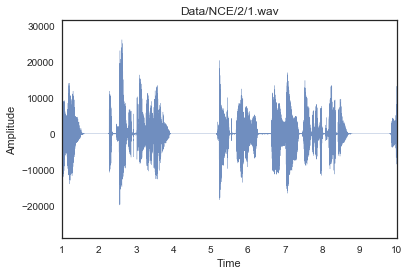

In [16]:
## Get the raw sound data as array
r_np = sound.get_array_of_samples()
sns.set_style("white")
##inspect time vs Amplitude
plt.clf()
plt.title(f_wav)
plt.plot(np.linspace(0, len(r_np)/sound.frame_rate, len(r_np)), r_np, linewidth=0.3, alpha=0.8)
plt.xlim(1, 10)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

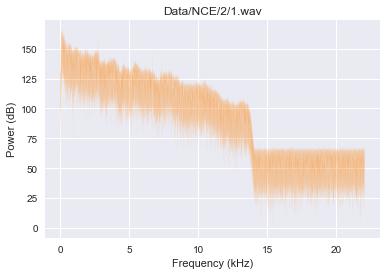

In [7]:
## Frequency analysis, if needed
fourier=fft.fft(r_np)
plt.clf()
# plt.subplot(1, 2, 1)
# plt.plot(fourier, color='#ff7f00')
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude')
# plt.title(f_wav)

n = len(r_np)
fourier = fourier[0:int(n/2)]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)
fourier = abs(fourier)
fourier = fourier ** 2

# rebase 0 as the minimal voice
vol =  10*np.log10(fourier) - 10*np.log10(min(fourier))

#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (sound.frame_rate*1.0/n);

# plt.subplot(1, 2, 2)
plt.plot(freqArray/1000, vol, color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.title(f_wav)
plt.show()


***
### Sound file decomposition
***

In [166]:
## split sound in 10-second slices and export
start_time = time.time()
sound_file = AudioSegment.from_wav(f_wav)
print(sound_file.duration_seconds/60)
for i, chunk in enumerate(sound_file[::30 * 1000]):
  with open("chunk_s" + str(i) + ".wav", "wb") as f:
    chunk.export(f, format="wav")

print("--- %s seconds ---" % (time.time() - start_time))
!ls

1.3065578231292518
--- 0.028814077377319336 seconds ---
Data                     Plot                     chunk_s0.wav
DownloadAudio_NPR.ipynb  Prev_MVP.ipynb           chunk_s1.wav
Jun15_MVP.ipynb          README.md                chunk_s2.wav
Jun8_MVPProcessing.ipynb Sphinx-VS-Google.ipynb   src
Jun8_MVPrecording.ipynb  Text_to_Suammary.ipynb   website
MVP.ipynb                all_sum.txt
NLP_studies.ipynb        all_trans.txt


In [16]:
#sound_file = AudioSegment.from_wav(f_wav)
print("DURATION", sound_file.duration_seconds)
print("DBFS", sound_file.dBFS, "Max DBFS", sound_file.max_dBFS)
print("RMS", sound_file.rms, np.log(sound_file.rms))
print("Frame rate", sound_file.frame_rate)

159.16408163265305
DBFS -21.242631898253602 Max DBFS -1.53625337582213
RMS 2840 7.95155933116
Frame rate 44100


In [51]:
#f_wav = "Data/Live/output_8.wav"
#f_wav = 'Data/NCE/2/1.wav'
f_wav = 'Data/NPR_story/1.mp3'
!rm chunk_*.wav
# silence split, if necessary
start_time = time.time()
#sound_file = AudioSegment.from_wav(f_wav)
sound_file = AudioSegment.from_mp3(f_wav)
audio_chunks = split_on_silence(sound_file, 
    # must be silent for at least half a second; in ms
    min_silence_len=500,
    # keep a part of silence so there is no cutoff ; in ms                           
    keep_silence=250,
    # consider it silent; roughly this is 10dB, intensity 1/10 of the ave
    silence_thresh= (sound_file.dBFS * 1.5 - sound_file.max_dBFS/2))

print(len(audio_chunks))
## split into chunks
for i, chunk in enumerate(audio_chunks):
    out_file = "chunk_s{0}.wav".format(i)
    print("exporting", out_file, chunk.dBFS, chunk.max_dBFS, chunk.duration_seconds, chunk.rms)
    chunk.export(out_file, format="wav")

print("--- %s seconds ---" % (time.time() - start_time))
!ls

42
exporting chunk_s0.wav -19.284879824236235
exporting chunk_s1.wav -20.34554548646348
exporting chunk_s2.wav -19.067902106066782
exporting chunk_s3.wav -20.055310774851087
exporting chunk_s4.wav -21.640002823962433
exporting chunk_s5.wav -21.160444840264667
exporting chunk_s6.wav -24.345041356998056
exporting chunk_s7.wav -22.426972658393463
exporting chunk_s8.wav -20.594570169562758
exporting chunk_s9.wav -20.375939914176
exporting chunk_s10.wav -21.09705492124233
exporting chunk_s11.wav -21.979517117189943
exporting chunk_s12.wav -20.67441475999404
exporting chunk_s13.wav -20.43983767929059
exporting chunk_s14.wav -20.749219174176567
exporting chunk_s15.wav -20.329011427591293
exporting chunk_s16.wav -22.636281331956766
exporting chunk_s17.wav -22.44100479333232
exporting chunk_s18.wav -21.23651722736534
exporting chunk_s19.wav -22.100202974987425
exporting chunk_s20.wav -21.691379770136532
exporting chunk_s21.wav -21.064034392094406
exporting chunk_s22.wav -21.588927985796428
expo

In [53]:
print(len(audio_chunks))
fulldbfs = []
fullmaxdbfs = []
fullmax = []
fullrms = []
## split into chunks
for i, chunk in enumerate(audio_chunks):
    out_file = "chunk_s{0}.wav".format(i)
    fulldbfs.append(chunk.dBFS)
    fullmaxdbfs.append(chunk.max_dBFS)
    fullmax.append(chunk.max)
    fullrms.append(chunk.rms)
    print("exporting", out_file, chunk.dBFS, chunk.max_dBFS, chunk.duration_seconds, chunk.rms)
    chunk.export(out_file, format="wav")

print("--- %s seconds ---" % (time.time() - start_time))
!ls

42
exporting chunk_s0.wav -19.284879824236235 -1.53625337582213 9.13498866213152 3558
exporting chunk_s1.wav -20.34554548646348 -2.159141109992312 7.151995464852607 3149
exporting chunk_s2.wav -19.067902106066782 -4.91967383168064 1.4479818594104308 3648
exporting chunk_s3.wav -20.055310774851087 -3.2011178067309416 3.731995464852608 3256
exporting chunk_s4.wav -21.640002823962433 -2.2644590686078327 9.696984126984127 2713
exporting chunk_s5.wav -21.160444840264667 -2.0366338654545038 6.490997732426304 2867
exporting chunk_s6.wav -24.345041356998056 -6.167087890809997 0.6229931972789116 1987
exporting chunk_s7.wav -22.426972658393463 -4.71748477665996 1.1760090702947845 2478
exporting chunk_s8.wav -20.594570169562758 -1.9168220010322998 15.089002267573695 3060
exporting chunk_s9.wav -20.375939914176 -2.7763647670236935 4.089002267573696 3138
exporting chunk_s10.wav -21.09705492124233 -2.71020424315604 2.86 2888
exporting chunk_s11.wav -21.979517117189943 -1.9682051974199752 1.974013605

In [42]:
fulltextdic = {}
for i in tqdm(range(42)):
    fulltextdic.update(SoundToText('chunk_s' + str(i) + '.wav'))

  0%|          | 0/42 [00:00<?, ?it/s]

chunk_s0.wav


  2%|▏         | 1/42 [00:04<03:04,  4.51s/it]

chunk_s1.wav


  5%|▍         | 2/42 [00:07<02:36,  3.92s/it]

chunk_s2.wav


  7%|▋         | 3/42 [00:08<01:53,  2.91s/it]

chunk_s3.wav


 10%|▉         | 4/42 [00:09<01:33,  2.45s/it]

chunk_s4.wav


 12%|█▏        | 5/42 [00:13<01:37,  2.63s/it]

chunk_s5.wav


 14%|█▍        | 6/42 [00:15<01:34,  2.62s/it]

chunk_s6.wav


 17%|█▋        | 7/42 [00:16<01:21,  2.32s/it]

chunk_s7.wav


 19%|█▉        | 8/42 [00:17<01:12,  2.13s/it]

chunk_s8.wav


 21%|██▏       | 9/42 [00:26<01:35,  2.90s/it]

chunk_s9.wav


 24%|██▍       | 10/42 [00:27<01:27,  2.74s/it]

chunk_s10.wav


 26%|██▌       | 11/42 [00:28<01:20,  2.61s/it]

chunk_s11.wav


 29%|██▊       | 12/42 [00:30<01:15,  2.50s/it]

chunk_s12.wav


 31%|███       | 13/42 [00:31<01:11,  2.46s/it]

chunk_s13.wav


 33%|███▎      | 14/42 [00:32<01:05,  2.34s/it]

chunk_s14.wav


 36%|███▌      | 15/42 [00:33<01:00,  2.24s/it]

chunk_s15.wav


 38%|███▊      | 16/42 [00:34<00:56,  2.17s/it]

chunk_s16.wav


 40%|████      | 17/42 [00:35<00:52,  2.10s/it]

chunk_s17.wav


 43%|████▎     | 18/42 [00:37<00:49,  2.06s/it]

chunk_s18.wav


 45%|████▌     | 19/42 [00:38<00:46,  2.03s/it]

chunk_s19.wav


 48%|████▊     | 20/42 [00:39<00:43,  1.97s/it]

chunk_s20.wav


 50%|█████     | 21/42 [00:41<00:41,  1.99s/it]

chunk_s21.wav


 52%|█████▏    | 22/42 [00:42<00:38,  1.93s/it]

chunk_s22.wav


 55%|█████▍    | 23/42 [00:43<00:35,  1.89s/it]

chunk_s23.wav


 57%|█████▋    | 24/42 [00:44<00:33,  1.84s/it]

chunk_s24.wav


 60%|█████▉    | 25/42 [00:45<00:30,  1.81s/it]

chunk_s25.wav


 62%|██████▏   | 26/42 [00:46<00:28,  1.79s/it]

chunk_s26.wav


 64%|██████▍   | 27/42 [00:47<00:26,  1.74s/it]

chunk_s27.wav


 67%|██████▋   | 28/42 [00:48<00:24,  1.73s/it]

chunk_s28.wav


 69%|██████▉   | 29/42 [00:50<00:22,  1.73s/it]

chunk_s29.wav


 71%|███████▏  | 30/42 [00:51<00:20,  1.70s/it]

chunk_s30.wav


 74%|███████▍  | 31/42 [00:52<00:18,  1.68s/it]

chunk_s31.wav


 76%|███████▌  | 32/42 [00:52<00:16,  1.65s/it]

chunk_s32.wav


 79%|███████▊  | 33/42 [00:53<00:14,  1.63s/it]

chunk_s33.wav


 81%|████████  | 34/42 [00:54<00:12,  1.61s/it]

chunk_s34.wav


 83%|████████▎ | 35/42 [00:55<00:11,  1.60s/it]

chunk_s35.wav


 86%|████████▌ | 36/42 [00:56<00:09,  1.57s/it]

chunk_s36.wav


 88%|████████▊ | 37/42 [00:57<00:07,  1.55s/it]

chunk_s37.wav


 90%|█████████ | 38/42 [00:58<00:06,  1.53s/it]

chunk_s38.wav


 93%|█████████▎| 39/42 [00:59<00:04,  1.54s/it]

chunk_s39.wav


 95%|█████████▌| 40/42 [01:00<00:03,  1.51s/it]

chunk_s40.wav


 98%|█████████▊| 41/42 [01:01<00:01,  1.51s/it]

chunk_s41.wav


100%|██████████| 42/42 [01:13<00:00,  1.74s/it]


In [46]:
fulltext = ""
fulltime = []
for l in range(len(fulltextdic.keys())):
    #print(fulltextdic.keys())
    fulltext += fulltextdic['chunk_s' + str(l) + '.wav'][0] + " ; "
    fulltime.append(fulltextdic['chunk_s' + str(l) + '.wav'][1])
print(fulltext)
print(fulltime)

in in this friday which is where we're from strike or and today we have a man with an awkward last night hi mrs allen fuchs ; my last name is build a few kate has his son of russian immigrants robber the united states getting a lot of taunting ; about that last name ; you recently talked about the teasing with his middle school classmates banter kept ; no mccoy by mining o's either the f. word dumbo because of acute years or combinations of sue is that the us walking around with an army of hecklers be ; i still the doses consciously the small ain't haunting that was always there are great but what a rubber the first time ; you saw me ; you can step out on the first ; you had a hole in gold chain mail about church as with the younger man not a haircut and ted koppel haircut and i we don't know that i had it in me to stick up for you at that age no ability of the fact that the kamikaze mission ; no this country is so polarized but kids of all demographic ; they were united in making fond

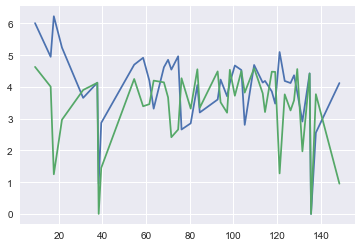

In [66]:
plt.plot(np.cumsum(fulltime), fulldbfs - np.min(fulldbfs))
plt.plot(np.cumsum(fulltime), fullmaxdbfs - np.min(fullmaxdbfs))
#plt.plot(np.cumsum(fulltime), fullrms - np.min(fullrms))
#plt.plot(np.cumsum(fulltime), fullmax - np.min(fullmax))
plt.show()

In [132]:
start_time = time.time()
print(PrepareSound("Data/NPR/0.mp3", fixsplit=False, silencesplit=True).keys())
print("--- %s seconds ---" % (time.time() - start_time))

dict_keys(['Data/NPR/0.wav', 'Data/NPR/0_0.wav', 'Data/NPR/0_1.wav', 'Data/NPR/0_2.wav', 'Data/NPR/0_3.wav', 'Data/NPR/0_4.wav', 'Data/NPR/0_5.wav', 'Data/NPR/0_6.wav', 'Data/NPR/0_7.wav', 'Data/NPR/0_8.wav', 'Data/NPR/0_9.wav', 'Data/NPR/0_10.wav', 'Data/NPR/0_11.wav', 'Data/NPR/0_12.wav', 'Data/NPR/0_13.wav', 'Data/NPR/0_14.wav', 'Data/NPR/0_15.wav', 'Data/NPR/0_16.wav', 'Data/NPR/0_17.wav', 'Data/NPR/0_18.wav', 'Data/NPR/0_19.wav', 'Data/NPR/0_20.wav', 'Data/NPR/0_21.wav', 'Data/NPR/0_22.wav', 'Data/NPR/0_23.wav', 'Data/NPR/0_24.wav', 'Data/NPR/0_25.wav', 'Data/NPR/0_26.wav', 'Data/NPR/0_27.wav', 'Data/NPR/0_28.wav', 'Data/NPR/0_29.wav', 'Data/NPR/0_30.wav', 'Data/NPR/0_31.wav', 'Data/NPR/0_32.wav', 'Data/NPR/0_33.wav', 'Data/NPR/0_34.wav', 'Data/NPR/0_35.wav', 'Data/NPR/0_36.wav', 'Data/NPR/0_37.wav', 'Data/NPR/0_38.wav', 'Data/NPR/0_39.wav', 'Data/NPR/0_40.wav', 'Data/NPR/0_41.wav', 'Data/NPR/0_42.wav', 'Data/NPR/0_43.wav', 'Data/NPR/0_44.wav', 'Data/NPR/0_45.wav', 'Data/NPR/0_46.


***
### Text recognition
***


In [3]:
!ls

Data                     NLP_studies.ipynb        all_sum.txt
DownloadAudio_NPR.ipynb  Plot                     all_trans.txt
Jun15_MVP.ipynb          Prev_MVP.ipynb           chunk_s2.wav
Jun8_MVPProcessing.ipynb README.md                src
Jun8_MVPrecording.ipynb  Sphinx-VS-Google.ipynb   website
MVP.ipynb                Text_to_Suammary.ipynb


In [5]:
SoundToText('chunk_s2.wav')

ValueError: Grammar 'counting.gram' does not exist.

In [73]:
table = str.maketrans('', '', string.punctuation)
with open('Data/NCE/2/T' + str(1) + '.TXT', 'r') as myfile:
    realtext=myfile.read().replace('\n', '')
    realtext = realtext.translate(table)
    realtext = realtext.lower()
    realtext = ' '.join(realtext.split()) ## remove the extra space

In [74]:
with open('Data/NCE/2/' + str(1) + '_trans.txt', 'r') as myfile:
    comptext = myfile.read().replace('\n', '')
    comptext = comptext.lower()

In [11]:
def compare():
    '''compare list of texts in two folders'''
    result = [] ## an array of output wer scores
    for i in range(1, 1 + len(glob.glob("Data/NCE/2/T*.TXT"))):
        table = str.maketrans('', '', string.punctuation)
        ##NCE files
        #print(i)
        with open('Data/NCE/2/T' + str(i) + '.TXT', 'r') as myfile:
            realtext=myfile.read().replace('\n', '')
#         with open('Data/NCE/2/' + str(i) + '.txt', 'r') as myfile:
#             realtext=myfile.read().replace('\n', '')
#             ## removing the punctuation
            realtext = realtext.translate(table)
            realtext = realtext.lower()
            realtext = ' '.join(realtext.split()) ## remove the extra space
        ##translated files
        with open('Data/NCE/2/' + str(i) + '_trans.txt', 'r') as myfile:
            comptext = myfile.read().replace('\n', '')
            comptext = comptext.translate(table)
            comptext = comptext.lower()
        result.append(wer(realtext, comptext))
    return np.array(result)

In [12]:
NCE_2 = compare()

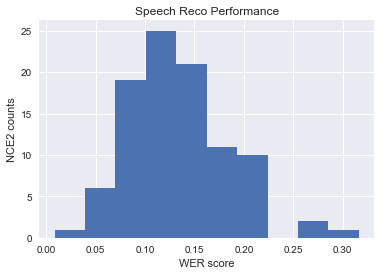

0.134742708333 0.0510665818336


In [18]:
plt.clf()
plt.hist(NCE_2)
plt.xlabel("WER score")
plt.ylabel("NCE2 counts")
plt.title("Speech Reco Performance")
plt.show()
print(NCE_2.mean(), NCE_2.std())

#### May need to remove small files
#### find *.wav  -type f -size -100k -delete

In [29]:
#!ls Data/NCE/2

#### For NPR processing

In [4]:
#start_time = time.time()
for i in tqdm(range(0, 314)):
    file_path = "Data/NPR/" ## total 314
    inputtasks = glob.glob(file_path + str(i) + "_*.wav")
    #print(" Running %s jobs on %s cores" % (len(inputtasks), mp.cpu_count()-2))
    npool = min(len(inputtasks), mp.cpu_count()-2)
    pool  = mp.Pool(npool)

    #print(inputtasks)
    inputdic = {}
    for k in range(len(inputtasks)):
        inputdic[k] = {"file":file_path + str(i) + "_" + str(k) + ".wav", "n":i}

    fulltextdic = {}
    ## parallel
    for result in pool.map(SoundToText, inputtasks):
            fulltextdic.update(result)
#     ## standard
#     for i in inputtasks:
#         print(i)
#         result = SoundToText(i) #dictionary of values, plots
#         fulltextdic.update(result)
    
    fulltext = ""
    for k in range(len(fulltextdic.keys())):
        fulltext += fulltextdic[file_path + str(i) + "_" + str(k) + ".wav"]
    #print(fulltext)
    with open(file_path + "_trans.txt", "w") as text_file:
            text_file.write(fulltext)
    pool.close()
#print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████| 61/61 [2:01:38<00:00, 119.65s/it]


#### For NCE processing

In [3]:
#start_time = time.time()
file_path = "Data/NCE/2/" ## total 314
inputtasks = glob.glob(file_path + "*.wav")
print(" Running %s jobs on %s cores" % (len(inputtasks), mp.cpu_count()-2))
npool = min(len(inputtasks), mp.cpu_count()-2)
pool  = mp.Pool(npool)

## parallel
for result in pool.map(SoundToText, inputtasks):  
    fulltext = list(result.values())[0]
    with open(list(result.keys())[0].replace(".wav", "") + "_trans.txt", "w") as text_file:
        text_file.write(fulltext)
            
# ## standard
# for i in inputtasks:
#     print(i)
#     result = SoundToText(i) #dictionary of values, plots
#     fulltext = list(result.values())[0]
#     with open(list(result.keys())[0].replace(".wav", "") + "_trans.txt", "w") as text_file:
#         text_file.write(fulltext)

pool.close()
#print("--- %s seconds ---" % (time.time() - start_time))

 Running 97 jobs on 6 cores


#### Or in steps

In [3]:
inputtasks = glob.glob("Data/NPR/0_*.wav")
print(" Running %s jobs on %s cores" % (len(inputtasks), mp.cpu_count()-2))
npool = min(len(inputtasks), mp.cpu_count()-2)
pool  = mp.Pool(npool)

print(inputtasks)
inputdic = {}
for i in range(len(inputtasks)):
    inputdic[i] = {"file":"Data/NPR/0_" + str(i) + ".wav", "n":i}

['Data/NPR/0_40.wav', 'Data/NPR/0_26.wav', 'Data/NPR/0_32.wav', 'Data/NPR/0_33.wav', 'Data/NPR/0_27.wav', 'Data/NPR/0_19.wav', 'Data/NPR/0_31.wav', 'Data/NPR/0_25.wav', 'Data/NPR/0_8.wav', 'Data/NPR/0_9.wav', 'Data/NPR/0_24.wav', 'Data/NPR/0_30.wav', 'Data/NPR/0_18.wav', 'Data/NPR/0_34.wav', 'Data/NPR/0_20.wav', 'Data/NPR/0_21.wav', 'Data/NPR/0_35.wav', 'Data/NPR/0_23.wav', 'Data/NPR/0_37.wav', 'Data/NPR/0_36.wav', 'Data/NPR/0_22.wav', 'Data/NPR/0_13.wav', 'Data/NPR/0_2.wav', 'Data/NPR/0_3.wav', 'Data/NPR/0_12.wav', 'Data/NPR/0_38.wav', 'Data/NPR/0_10.wav', 'Data/NPR/0_1.wav', 'Data/NPR/0_0.wav', 'Data/NPR/0_11.wav', 'Data/NPR/0_39.wav', 'Data/NPR/0_15.wav', 'Data/NPR/0_29.wav', 'Data/NPR/0_4.wav', 'Data/NPR/0_5.wav', 'Data/NPR/0_28.wav', 'Data/NPR/0_14.wav', 'Data/NPR/0_16.wav', 'Data/NPR/0_7.wav', 'Data/NPR/0_6.wav', 'Data/NPR/0_17.wav']


In [20]:
start_time = time.time()
fulltextdic = {}
for i in inputtasks:
    result = SoundToText(i) #dictionary of values, plots
    print(result)
    fulltextdic.update(result)
print("--- %s seconds ---" % (time.time() - start_time))

chunk_s5.wav
{'chunk_s5.wav': "in the end i could not bear it i turned round again i can't hear though we're"}
chunk_s4.wav
{'chunk_s4.wav': 'i turned round i looked at the man in the woman angrily they did not pay any attention'}
chunk_s6.wav
{'chunk_s6.wav': "i said angrily it's none of your business the young man said rudely this is a"}
chunk_s7.wav
{'chunk_s7.wav': 'private conversation'}
chunk_s3.wav
{'chunk_s3.wav': 'sitting behind me they were talking loudly i got very angry i could not hear the actors'}
chunk_s2.wav
{'chunk_s2.wav': 'very good seats the play was very interesting i did not enjoy it a young man in the young woman worse'}
chunk_s0.wav
{'chunk_s0.wav': "bless 'em one at a private conversation first listen and then answer the question"}
chunk_s1.wav
{'chunk_s1.wav': "why did the right ear complained to the people behind him last week i went to the theater i hadn't"}
--- 16.12859082221985 seconds ---


In [9]:
## single file processing
start_time = time.time()
fulltextdic = {}
for result in pool.map(SoundToText, inputtasks):
        fulltextdic.update(result)
fulltext = ""
for i in range(len(fulltextdic.keys())):
    fulltext += fulltextdic["chunk_s" + str(i) + ".wav"]
print(fulltext)
print("--- %s seconds ---" % (time.time() - start_time))

KeyError: 'chunk_s0.wav'

In [30]:
with open('Data/NCE/2/T1.TXT', 'r') as myfile:
    realtext=myfile.read().replace('\n', '')

In [31]:
realtext

"               Lesson 1         A private conversation    First listen and then answer the question.    Why did the writer complain to the people behind him?    Last week I went to the theatre. I had a very good seat. The play was very interesting. I did not enjoy it. A young man and a young woman were sitting behind me. They were talking loudly. I got very angry. I could not hear the actors. I turned round. I looked at the man and the woman angrily. They did not pay any attention. In the end, I could not bear it. I turned round again. 'I can't hear a word!' I said angrily.    'It's none of your business,' the young man said rudely. 'This is a private conversation!'"

***
### Text exploration
***

In [138]:
def text_clean(in_text):
    '''clean and remove some common words'''
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    
    # Tokenizing the text
    tokens = tokenizer.tokenize(in_text)
    # A new list to hold the lowercased words
    words = []
    for word in tokens:
        words.append(word.lower())
        
    # Getting the English stop words from nltk
    sw = nltk.corpus.stopwords.words('english')
    
    # A new list to hold Moby Dick with No Stop words
    words_ns = []

    # Appending to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Creating the word frequency distribution
    freqdist = nltk.probability.FreqDist(words_ns)

    # Plotting the word frequency distribution
    plt.clf()
    fig=plt.figure(figsize=(6, 4))
    plt.subplots_adjust(bottom=0.3)
    freqdist.plot(10)
    fig.savefig("Plot/word_freq.pdf", format="pdf")    
    print(freqdist.most_common(5))
    
    out_text = " ".join(str(x) for x in words_ns)
    return out_text

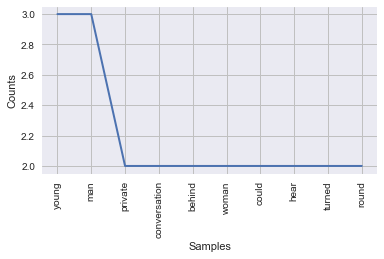

[('young', 3), ('man', 3), ('private', 2), ('conversation', 2), ('behind', 2)]


'lesson 1 private conversation first listen answer question writer complain people behind last week went theatre good seat play interesting enjoy young man young woman sitting behind talking loudly got angry could hear actors turned round looked man woman angrily pay attention end could bear turned round hear word said angrily none business young man said rudely private conversation'

In [139]:
text_clean(realtext)

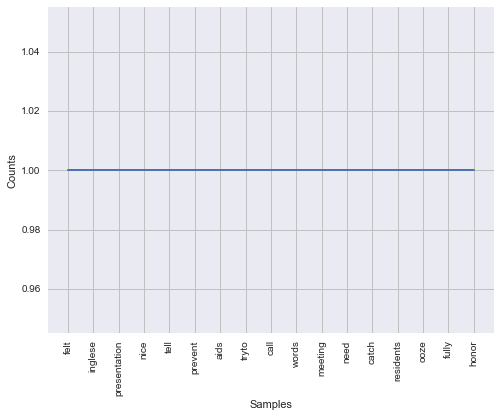

[('felt', 1), ('inglese', 1), ('presentation', 1), ('nice', 1), ('tell', 1)]


'felt inglese presentation nice tell prevent aids tryto call words meeting need catch residents ooze fully honor'

In [113]:
text_clean(fulltext)

## Sumy text summarization

In [3]:
#from __future__ import absolute_import
#from __future__ import division, print_function, unicode_literals

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

LANGUAGE = "english"
SENTENCES_COUNT = 10

#url = "http://www.zsstritezuct.estranky.cz/clanky/predmety/cteni/jak-naucit-dite-spravne-cist.html"
#parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
# or for plain text files
parser = PlaintextParser.from_file("Data/NCE/2/T1.txt", Tokenizer(LANGUAGE))
stemmer = Stemmer(LANGUAGE)

summarizer = Summarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

Lesson 1 A private conversation
First listen and then answer the question.
Why did the writer complain to the people behind him?
A young man and a young woman were sitting behind me.
I could not hear the actors.
I turned round.
I looked at the man and the woman angrily.
I turned round again.
'I can't hear a word!'
'It's none of your business,' the young man said rudely.


***
### Live Audio import
***

In [49]:
def record_live(Name="output", Length=100, Nout=Lseg, Running=False):
    '''this function records audio, length in seconds'''
    start_time = time.time()
    FORMAT = pyaudio.paInt16
    RATE = 32000
    RECORD_SECONDS = Lseg ## fixed 10 sec pieces
    CHANNELS = 1  ##2 for stereo
    CHUNK = 1024

    ## initialize pyaudio
    p = pyaudio.PyAudio()
    
    N_rec = Length/RECORD_SECONDS
    n_rec = 0

    #keypressed = input('Press q to quit: ')
    while n_rec < N_rec:
        stream = p.open(format=FORMAT,
                            channels=CHANNELS,
                            rate=RATE,
                            input=True,
                            frames_per_buffer=CHUNK)
        print("* recording: " + str(n_rec))

        frames = []

        for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
            data = stream.read(CHUNK)
            frames.append(data)

        ## initialize output waveform
        wf = wave.open("Data/Live/" + Name + "_" + str(n_rec) + ".wav", 'wb')
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(p.get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(b''.join(frames))
        n_rec += 1
        
    stream.stop_stream()
    stream.close()
    p.terminate()

    wf.close()
    print("--- %s seconds ---" % (time.time() - start_time))
    return

In [48]:
!ls Data/Live/
!rm Data/Live/output*
!ls Data/Live/

rm: Data/Live/output*: No such file or directory


In [50]:
record_live(Length=180)

* recording: 0
* recording: 1
* recording: 2
* recording: 3
* recording: 4
* recording: 5
* recording: 6
* recording: 7
* recording: 8
* recording: 9
* recording: 10
* recording: 11
* recording: 12
* recording: 13
* recording: 14
* recording: 15
* recording: 16
* recording: 17
--- 182.67663073539734 seconds ---


In [51]:
!ls Data/Live/

output_0.wav  output_12.wav output_16.wav output_4.wav  output_8.wav
output_1.wav  output_13.wav output_17.wav output_5.wav  output_9.wav
output_10.wav output_14.wav output_2.wav  output_6.wav
output_11.wav output_15.wav output_3.wav  output_7.wav


In [52]:
start_time = time.time()

mytasks = glob.glob("Data/Live/output_*.wav")
print(" Running %s jobs on %s cores" % (len(mytasks), mp.cpu_count()-2))
npool = min(len(mytasks), mp.cpu_count()-2)
pool  = mp.Pool(npool)
print(mytasks)
inputdic = {}
for i in range(len(mytasks)):
    inputdic[i] = {"file":"Data/Live/output_" + str(i) + ".wav", "n":i}
    
mytextdic = {}
for result in pool.map(SoundToText, mytasks):
        mytextdic.update(result)
mytext = ""
for i in range(len(mytextdic.keys())):
    mytext += mytextdic["Data/Live/output_" + str(i) + ".wav"]
print(mytext)
print("--- %s seconds ---" % (time.time() - start_time))

 Running 18 jobs on 6 cores
Data/Live/output_9.wav
Data/Live/output_8.wav
Data/Live/output_11.wav
Data/Live/output_10.wav
Data/Live/output_12.wav
Data/Live/output_13.wav
['Data/Live/output_9.wav', 'Data/Live/output_8.wav', 'Data/Live/output_11.wav', 'Data/Live/output_10.wav', 'Data/Live/output_12.wav', 'Data/Live/output_13.wav', 'Data/Live/output_17.wav', 'Data/Live/output_16.wav', 'Data/Live/output_14.wav', 'Data/Live/output_15.wav', 'Data/Live/output_5.wav', 'Data/Live/output_4.wav', 'Data/Live/output_6.wav', 'Data/Live/output_7.wav', 'Data/Live/output_3.wav', 'Data/Live/output_2.wav', 'Data/Live/output_0.wav', 'Data/Live/output_1.wav']
Data/Live/output_17.wav
Data/Live/output_16.wav
Data/Live/output_14.wav
Data/Live/output_15.wav
Data/Live/output_5.wav
Data/Live/output_4.wav
Data/Live/output_6.wav
Data/Live/output_7.wav
Data/Live/output_3.wav
Data/Live/output_2.wav
Data/Live/output_0.wav
Data/Live/output_1.wav
the level of it though to talk about what or who wishes and c. n. for bre

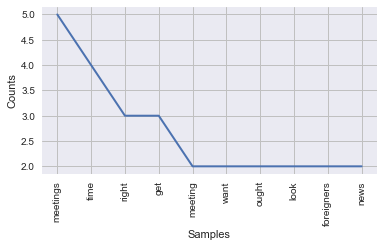

[('meetings', 5), ('time', 4), ('right', 3), ('get', 3), ('meeting', 2)]


'level though talk wishes c n breakfast meeting tax noso problem truth vicious already met la meetings acetate alsowhat called lotto red cells meeting gets rid somebody become take piece paper right nowthe chief wall fast primates useful married matters need us quit itoh want right contras meetings across loot especially meetings alwaysyou want someone nose right go meetings one ought work solution photos ought tothe user letters attend meetings see ghosts shoshone robot use youris product get eighties commerce needy awfully recorded actual moran says altosbut look fatally train pass ideas ready attorney talking aloneif foreigners better time forest usual canceled henry ford gingrich areon phone florida state stories read full outline speaker legal merit isis news bullets doeswhere actually uses like foreigners taxed different levels tar labs social great love exampleand prayer therefore new records means protests rich last time shots horizontal start buta little bit today sports news 

In [140]:
text_clean(mytext)

In [56]:
!ls Plot/

world_freq.pdf
